In [1]:
# hide ssl warnings for this example.
import requests
requests.packages.urllib3.disable_warnings()

# Fetching container data with python-fmrest

This is a short example on how to fetch container data with python-fmrest.

In [2]:
import fmrest

fms = fmrest.Server('https://10.211.55.15',
                    user='admin',
                    password='admin',
                    database='Contacts',
                    layout='Demo',
                    verify_ssl=False
                   )
fms.login()

'997175ad26b1db84594c590193a5b7609cc562cff07e9010448c'

## Get a record that has container data

In [3]:
record = fms.get_record(170)

# print locations of our two container fields
print(record.portrait)
print(record.video)

https://10.211.55.15/Streaming_SSL/MainDB/BF6B72F20D40DF69A18AD671A9FC978D0394145B6C20E7F54546DC213D8F0C97.png?RCType=EmbeddedRCFileProcessor
https://10.211.55.15/Streaming_SSL/MainDB/A744F78055D0E7AEA2DC873220AD8F54F6FC377CAC06D1E28C18BEB94196C594.mp4?RCType=EmbeddedRCFileProcessor


## Fetch container data

FileMaker Data API gives us a location to the asset in the container field. With the fetch_file() method, we can now access the data or get more informationen, such as size, about the file.

In [4]:
name, type_, length, response = fms.fetch_file(record.portrait)
name, type_, length

('BF6B72F20D40DF69A18AD671A9FC978D0394145B6C20E7F54546DC213D8F0C97.png',
 'image/png',
 '329139')

We get back the filename (unfortunately, this is only the unique name the Data API exposes), and the content type and content length as delivered in the response header. The actual response of the request will be available in our response variable (find out more about requests response object: http://docs.python-requests.org/en/master/user/advanced/#request-and-response-objects) 

So, we're looking at at 329kb jpeg file. We can access it with `response.content`.

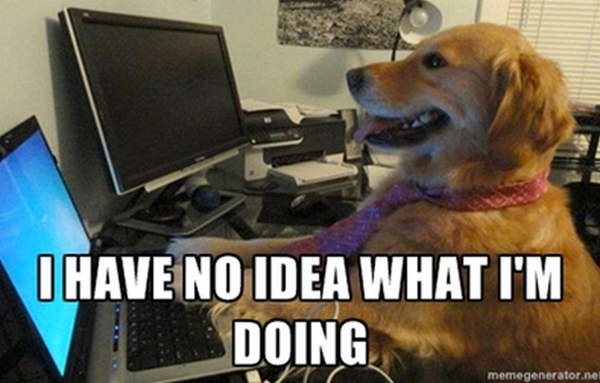

In [5]:
from IPython.display import Image
Image(response.content) 

## Fetch container data as stream

When you have large container data you may not want to immediately load the file into memory, but first check the size or write it to disk in chunks. To do this, use the `stream` argument, which will be passed on to the requests module.

In [6]:
name, type_, length, response = fms.fetch_file(record.video, stream=True)
name, type_, length

('A744F78055D0E7AEA2DC873220AD8F54F6FC377CAC06D1E28C18BEB94196C594.mp4',
 'video/mp4',
 '24642964')

Here we are looking at a mp4 video, which is 24 MB in size. We have access to type and length, but have not downloaded the content yet. (You have access to all `response.headers` without loading the content.)

If you now decide to store that file, you can do it, for example, as follows:

In [7]:
with open('my_awesome_video.mp4', 'wb') as file_:
    for chunk in response.iter_content(chunk_size=1024): 
        if chunk:
            file_.write(chunk)

Note that if you only want to read partial data, you should eventually close the connection by `response.close()`.